In [1]:
import pandas as pd

In [4]:
plt.style.use("ggplot")

In [3]:
import matplotlib.pyplot as plt

In [5]:
cov = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-04-04.xlsx")

In [8]:
cov.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0


In [7]:
cov.rename(columns = {"countriesAndTerritories":"country"}, inplace =True)

In [10]:
cov.head()

,dateRep,day,month,year,cases,deaths,country,geoId,countryterritoryCode,popData2018
0,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0


In [13]:
cov["country"].nunique()

204

In [17]:
usa_d = cov[["dateRep","cases","deaths","country"]]

In [18]:
usa_d = usa_d[usa_d["country"]=="United_States_of_America"]

In [19]:
usa_d.head()

,dateRep,cases,deaths,country
8411,2020-04-04,32425,1104,United_States_of_America
8412,2020-04-03,28819,915,United_States_of_America
8413,2020-04-02,27103,1059,United_States_of_America
8414,2020-04-01,24998,909,United_States_of_America
8415,2020-03-31,21595,661,United_States_of_America


In [150]:
usa_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 8411 to 8506
Data columns (total 4 columns):
dateRep    96 non-null datetime64[ns]
cases      96 non-null int64
deaths     96 non-null int64
country    96 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ KB


## How the number  of new cases found in USA gradually increased each day.

<IPython.core.display.Javascript object>


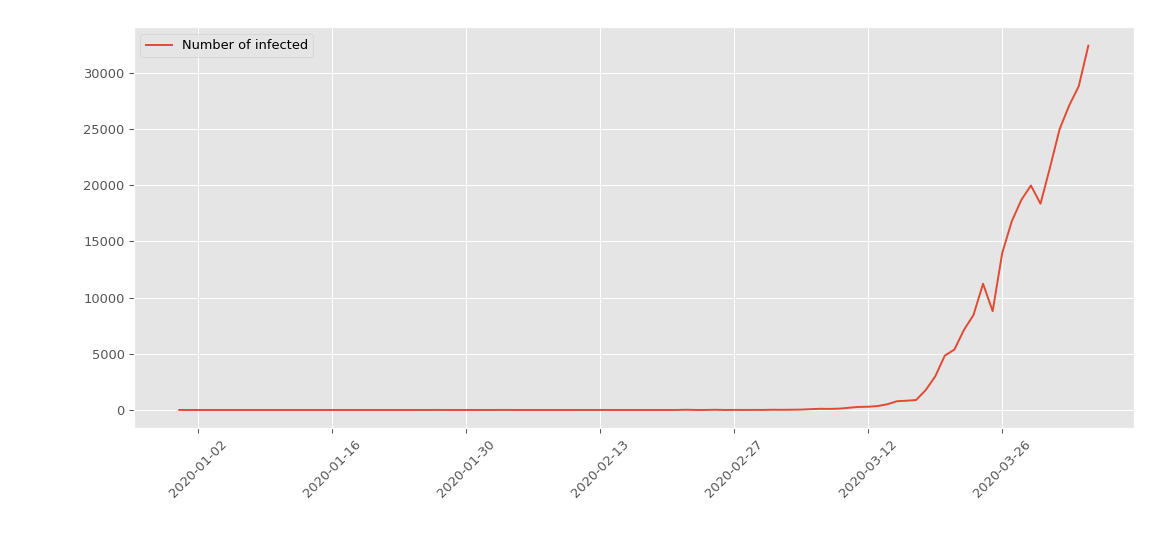

In [26]:

plt.plot(usa_d['dateRep'],usa_d['cases'],label = "Number of infected")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.legend()

In [165]:
sp = cov[cov["country"]=="Spain"]

In [168]:
sp = sp[["dateRep","cases","deaths"]]

In [171]:
sp.shape

(96, 3)

In [9]:
import numpy as np

In [182]:

total_cases =np.array(sp["cases"])

In [189]:
total_deaths = np.array(sp["deaths"])


In [191]:
for i in range(94,-1,-1):
    total_deaths[i] = total_deaths[i] + total_deaths[i+1]

In [183]:
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]

In [185]:
sp["total_cases"] = total_cases

In [192]:
sp["total_deaths"] = total_deaths

## The below graph shows the growth in the number of Covid-19 cases and deaths in Spain till 4th April, 2020.

<IPython.core.display.Javascript object>


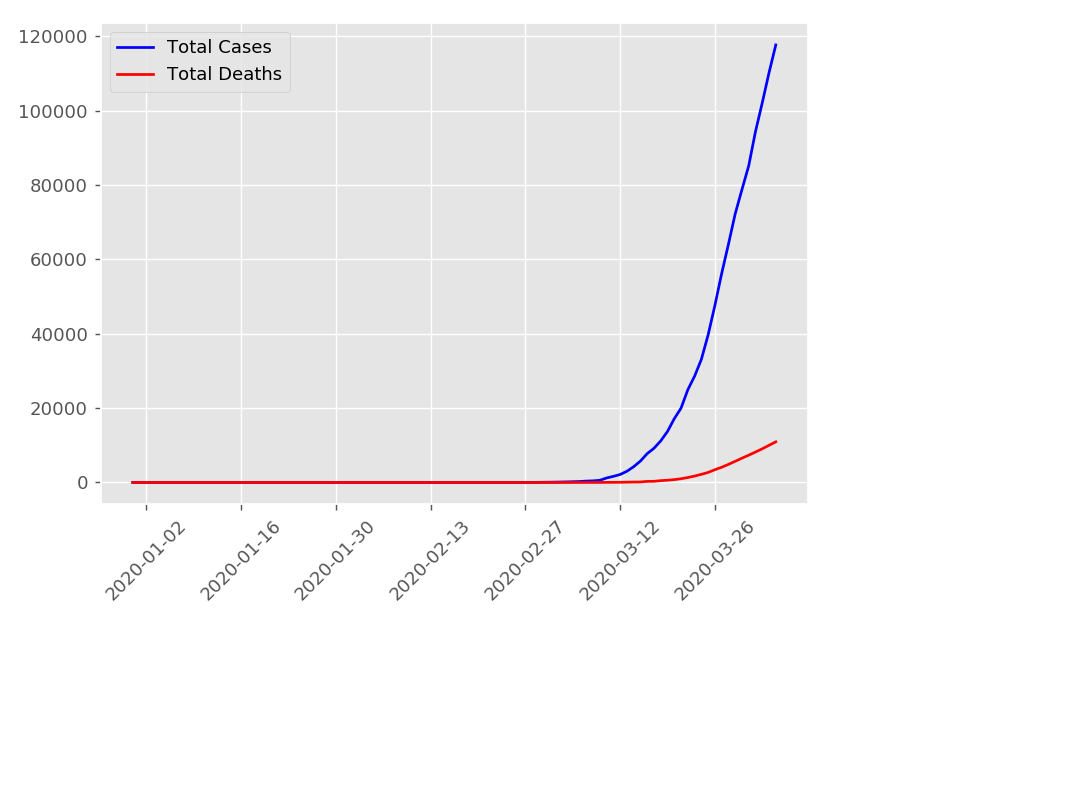

In [198]:
plt.plot(sp["dateRep"],sp["total_cases"], color = "blue",label = 'Total Cases')
plt.plot(sp["dateRep"],sp["total_deaths"], color ="red", label = "Total Deaths")
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()

In [15]:
%matplotlib notebook

## The below graph compares how the number of cases has increased in USA, Spain and Italy  

<IPython.core.display.Javascript object>


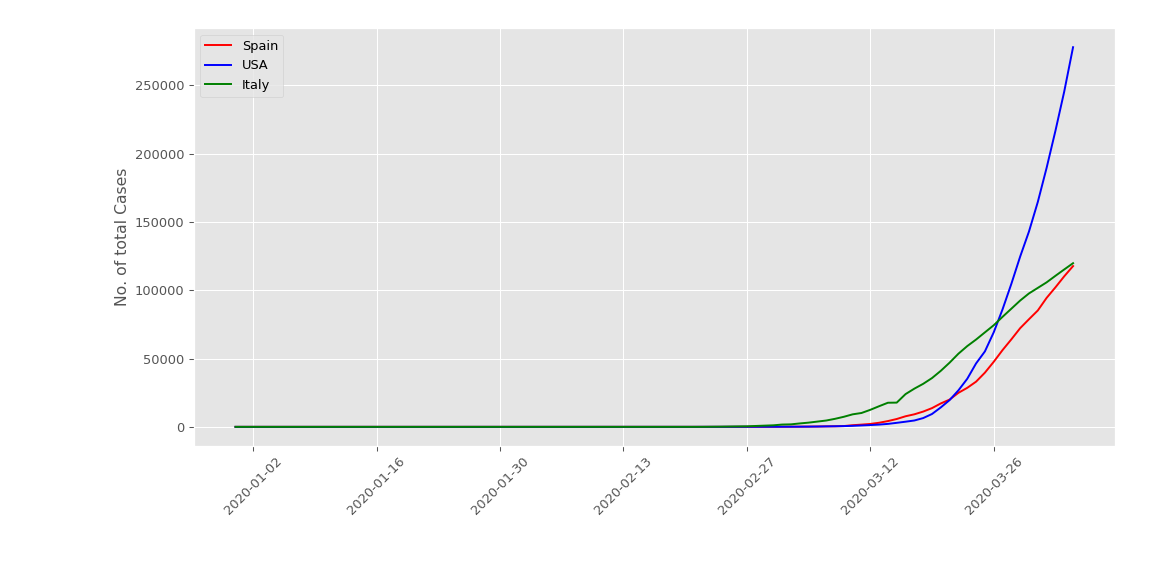

In [65]:
s = cov[cov["country"]=="Spain"]
s = s[["dateRep","cases"]]
us = cov[cov["country"]=="United_States_of_America"]
us = us[["dateRep","cases"]]
it = cov[cov["country"]=="Italy"]
it = it[["dateRep","cases"]]

total_cases =np.array(s["cases"])
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]
s["total_cases"] = total_cases   

total_cases =np.array(us["cases"])
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]
us["total_cases"] = total_cases   

total_cases =np.array(it["cases"])
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]
it["total_cases"] = total_cases   

plt.plot(s["dateRep"],s["total_cases"], color = "red",label = 'Spain')
plt.plot(us["dateRep"],us["total_cases"], color = "blue",label = 'USA')
plt.plot(it["dateRep"],it["total_cases"], color = "green",label = 'Italy')
plt.legend()
plt.ylabel("No. of total Cases")
plt.xticks(rotation = 45)
plt.tight_layout()

## The below curve compares the total number of deaths due to Covid-19 in USA, Spain and Italy 

<IPython.core.display.Javascript object>


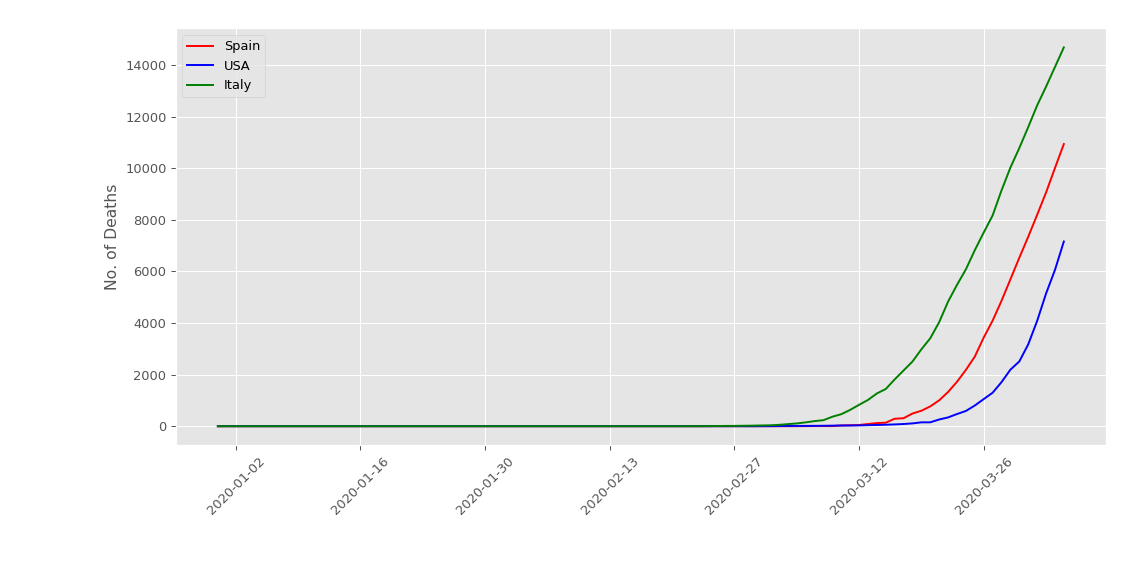

In [67]:
s = cov[cov["country"]=="Spain"]
s = s[["dateRep","deaths"]]
us = cov[cov["country"]=="United_States_of_America"]
us = us[["dateRep","deaths"]]
it = cov[cov["country"]=="Italy"]
it = it[["dateRep","deaths"]]

total_cases =np.array(s["deaths"])
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]
s["total_deaths"] = total_cases   

total_cases =np.array(us["deaths"])
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]
us["total_deaths"] = total_cases   

total_cases =np.array(it["deaths"])
for i in range(94,-1,-1):
    total_cases[i] = total_cases[i] + total_cases[i+1]
it["total_deaths"] = total_cases   

plt.plot(s["dateRep"],s["total_deaths"], color = "red",label = 'Spain')
plt.plot(us["dateRep"],us["total_deaths"], color = "blue",label = 'USA')
plt.plot(it["dateRep"],it["total_deaths"], color = "green",label = 'Italy')
plt.legend()
plt.ylabel("No. of Deaths")
plt.xticks(rotation = 45)
plt.tight_layout()

In [130]:
top = cov.groupby("country").sum()[["cases","deaths"]].sort_values("cases",ascending = False)
top.head()

,cases,deaths
country,,
United_States_of_America,277965,7157
Italy,119827,14681
Spain,117710,10935
China,82527,3330
Germany,79696,1017


<IPython.core.display.Javascript object>


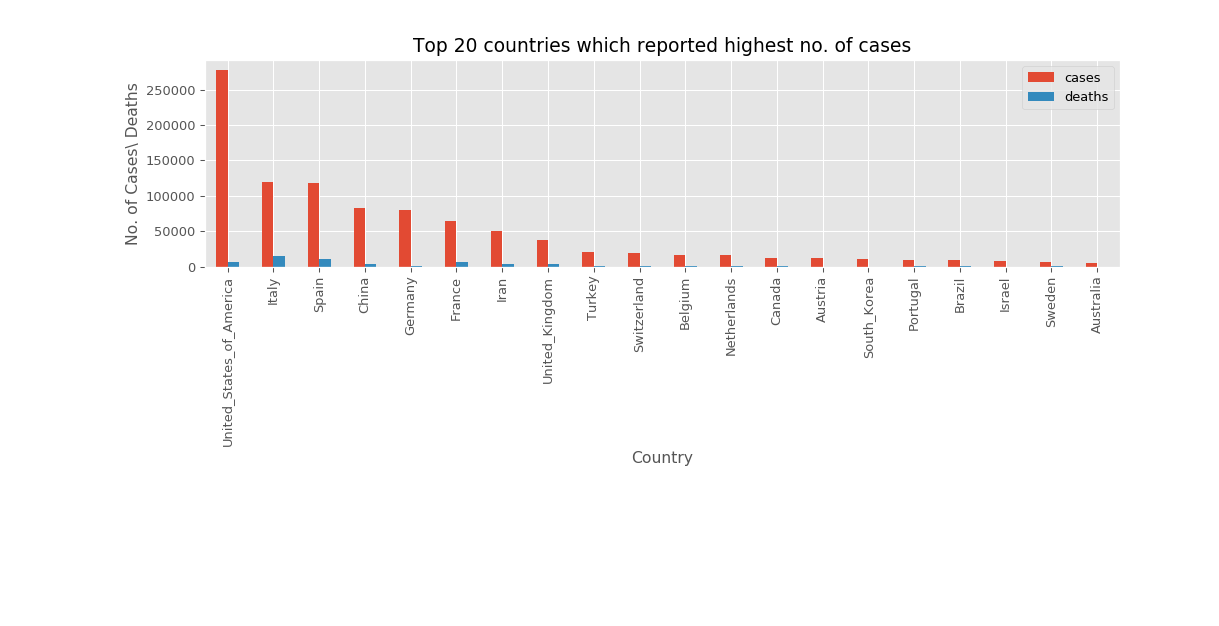

In [131]:
top.head(20).plot(kind =" bar")
plt.title("Top 20 countries which reported highest no. of cases")
plt.xlabel("Country")
plt.ylabel("No. of Cases\ Deaths")
plt.tight_layout()
plt.show()

In [51]:
no_of_case = list(top.values[0:6])

In [52]:
rest = top.values[6:].sum()

In [53]:
no_of_case.append(rest)
no_of_case

[277965, 119827, 117710, 82527, 79696, 64338, 339991]

In [54]:
total = top.values.sum()
total

1082054

In [47]:
top_countries = list(top.index[0:6])
top_countries.append("Remaining World")
top_countries

['United_States_of_America',
 'Italy',
 'Spain',
 'China',
 'Germany',
 'France',
 'Remaining World']

<IPython.core.display.Javascript object>


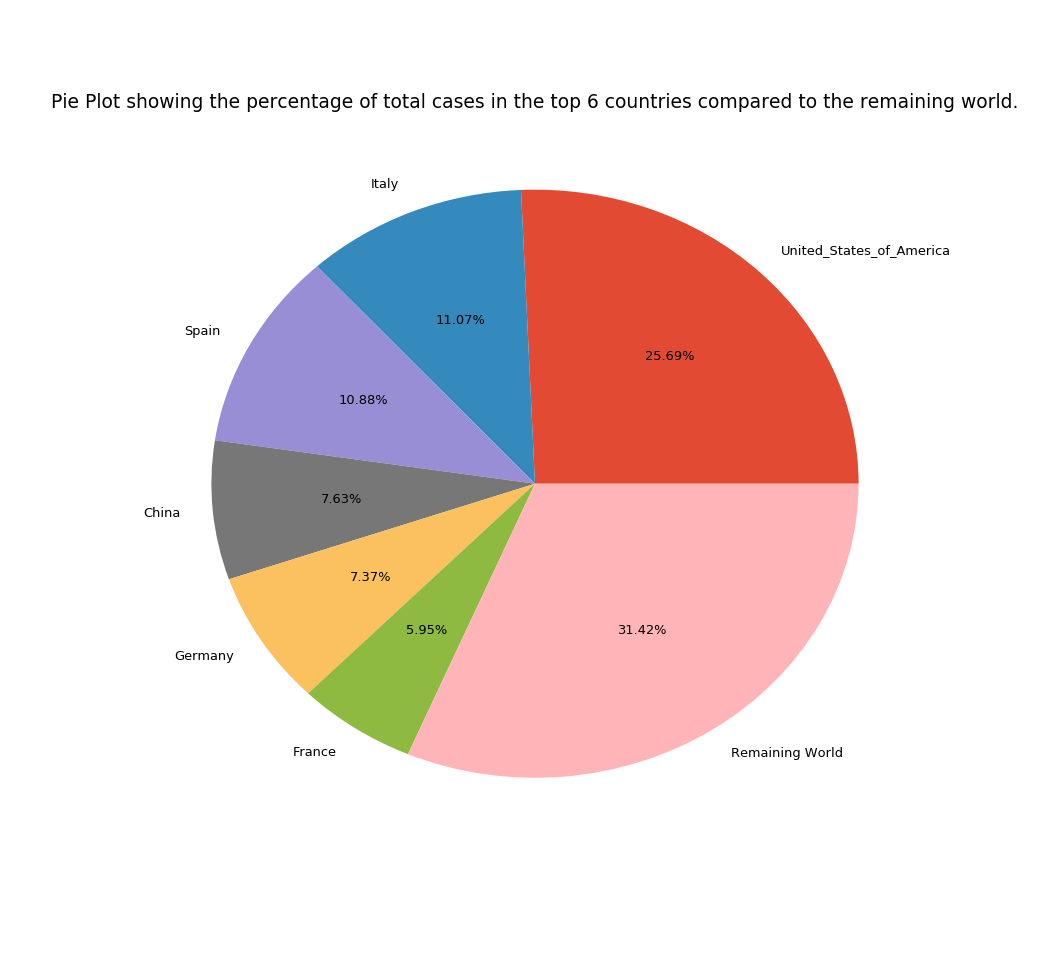

In [63]:
plt.pie(no_of_case, labels = top_countries,autopct = "%.2f%%")
plt.title("Pie Plot showing the percentage of total cases in the top 6 countries compared to the remaining world.")
plt.show()

In [69]:
china = cov[cov["country"]=="China"][["dateRep","cases","deaths"]]

In [70]:
china.head()

,dateRep,cases,deaths
1681,2020-04-04,62,4
1682,2020-04-03,70,10
1683,2020-04-02,100,6
1684,2020-04-01,54,1
1685,2020-03-31,84,3


In [76]:
dayno = np.arange(96,0,-1)
china["dayno"] = dayno

In [82]:
china.head()

,dateRep,cases,deaths,dayno
1681,2020-04-04,62,4,96
1682,2020-04-03,70,10,95
1683,2020-04-02,100,6,94
1684,2020-04-01,54,1,93
1685,2020-03-31,84,3,92


## The below graph shows how china has dealt with Covid-19. Also notice the slight increase in the number of cases after day 80. 

<IPython.core.display.Javascript object>


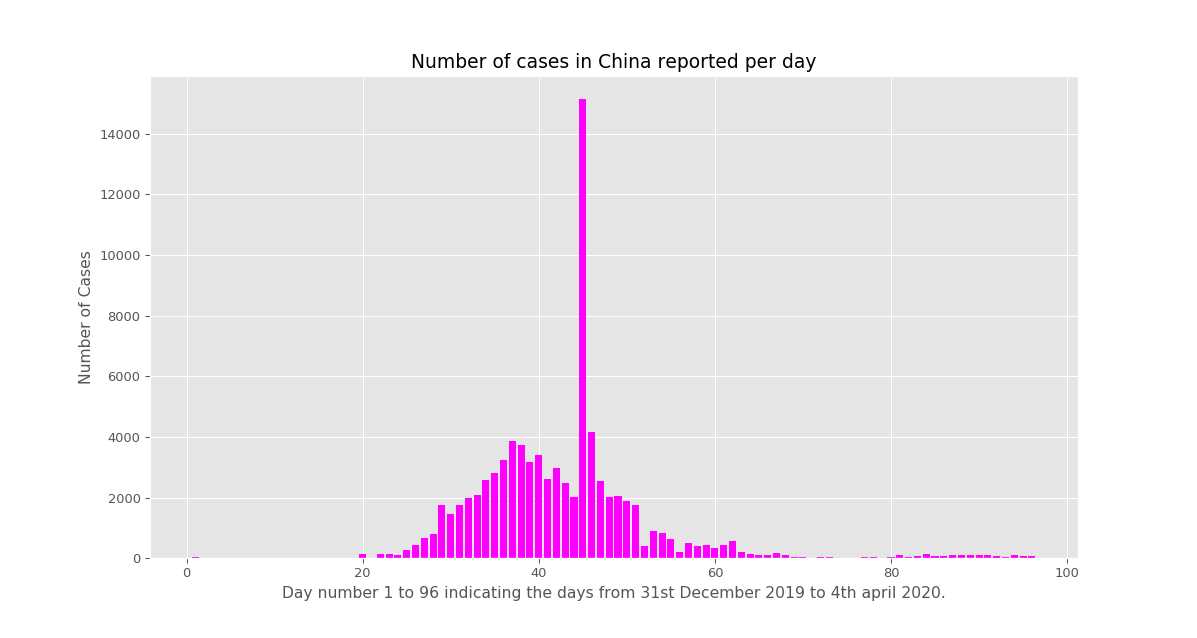

In [133]:
plt.bar(china["dayno"],china["cases"], color = "magenta")
plt.title("Number of cases in China reported per day")
plt.xlabel("Day number 1 to 96 indicating the days from 31st December 2019 to 4th april 2020.")
plt.ylabel("Number of Cases")
plt.show()

In [83]:
top.head()

country
United_States_of_America    277965
Italy                       119827
Spain                       117710
China                        82527
Germany                      79696
Name: cases, dtype: int64

In [112]:
sa = cov.groupby("country").sum()[["cases","deaths"]]

In [113]:
sa = sa.reset_index()

In [114]:
sa.head()
sa.shape

(204, 3)

In [117]:
south_asia = ["Nepal" , "Bhutan" , "Pakistan" , "Afghanistan" , "Sri_Lanka","India","Bangladesh"]

In [118]:
sa = sa[sa["country"].isin(south_asia)]

<IPython.core.display.Javascript object>


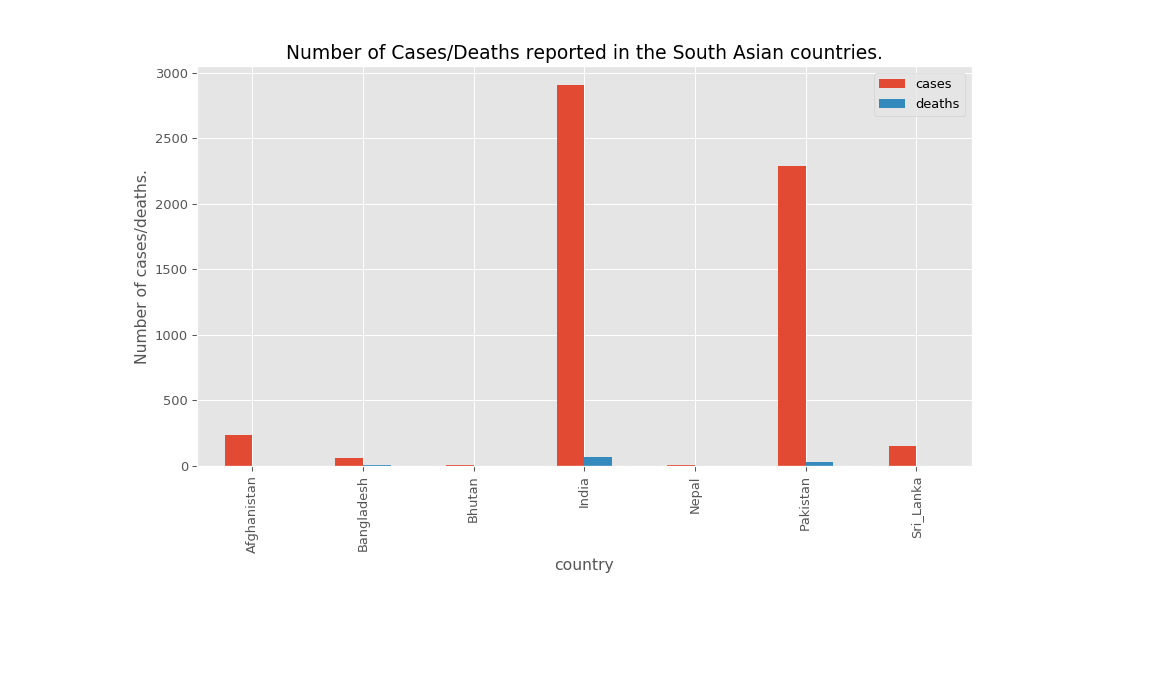

In [132]:
sa[["country","cases","deaths"]].set_index("country").plot(kind= "bar")
plt.ylabel("Number of cases/deaths.")
plt.title("Number of Cases/Deaths reported in the South Asian countries.")
plt.tight_layout()
plt.show()